# Polynomial Regression

## Integrantes

- Willy Corrales
- Alejandro Haro
- Josue Lozada
- Alex Caicedo
- Mateo Pillajo

**Iniciales del grupo: WAJMA**

---

### Introduccion
En este trabajo se analizan y comparan distintas técnicas de regresión aplicadas a un conjunto de datos, utilizando regresión cuadrática mediante un modelo analítico, descenso del gradiente y redes neuronales artificiales (MLP). El objetivo principal es evaluar el comportamiento, precisión y capacidad de ajuste de cada método frente a los datos, considerando tanto su rendimiento numérico (mediante métricas como MSE y R²) como su comportamiento gráfico.

## 1. Importación de Librerías

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor

## 2. Carga del Dataset

In [39]:
url = "https://raw.githubusercontent.com/Machine1314/natural_computing/main/data_regression.csv"
df = pd.read_csv(url)
df.head()

,i,xi,yi
0,1,6.6,-45.4
1,2,10.1,-176.6
2,3,8.9,-127.1
3,4,6.0,-31.1
4,5,13.3,-366.6


In [40]:
X = df.iloc[:, 0].values.reshape(-1,1)
y = df.iloc[:, 1].values.reshape(-1,1)

## 3. Escalamiento de Datos

In [41]:
# El escalamiento es fundamental para que los algoritmos converjan correctamente.
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

## 4. Regresión Cuadrática Analítica

In [42]:
# En este modelo utiliza una solución matemática directa para encontrar la mejor curva cuadrática.

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

model_analytical = LinearRegression()
model_analytical.fit(X_poly, y_scaled)

y_pred_analytical = model_analytical.predict(X_poly)

mse_analytical = mean_squared_error(y_scaled, y_pred_analytical)
r2_analytical = r2_score(y_scaled, y_pred_analytical)

mse_analytical, r2_analytical

(0.9467305874603892, 0.053269412539610705)

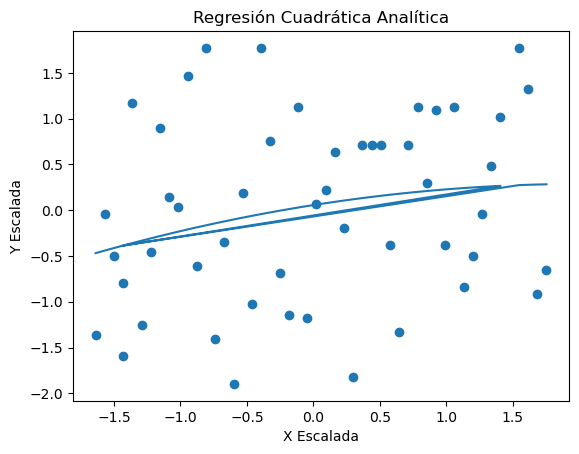

In [43]:
plt.figure()
plt.scatter(X_scaled, y_scaled)
plt.plot(X_scaled, y_pred_analytical)
plt.title("Regresión Cuadrática Analítica")
plt.xlabel("X Escalada")
plt.ylabel("Y Escalada")
plt.show()

# Regresión Cuadrática Analítica

- En este gráfico se observa la solución obtenida mediante el método analítico para la regresión cuadrática. La curva ajustada es estable y suave, ya que los parámetros del modelo se calculan directamente mediante una solución matemática exacta. Esto permite obtener resultados precisos de forma inmediata, sin necesidad de procesos iterativos.

## 5. Regresión por Descenso del Gradiente

In [44]:
m = len(X_scaled)
theta0 = 0
theta1 = 0
theta2 = 0
alpha = 0.01
epochs = 2000

In [45]:
def predict(x):
    return theta0 + theta1*x + theta2*(x**2)

In [46]:
loss_history = []
for _ in range(epochs):
    y_hat = predict(X_scaled)

    d0 = (-2/m)*np.sum(y_scaled - y_hat)
    d1 = (-2/m)*np.sum((y_scaled - y_hat)*X_scaled)
    d2 = (-2/m)*np.sum((y_scaled - y_hat)*(X_scaled**2))

    theta0 -= alpha * d0
    theta1 -= alpha * d1
    theta2 -= alpha * d2

    loss = np.mean((y_scaled - y_hat)**2)
    loss_history.append(loss)

In [47]:
y_pred_gd = predict(X_scaled)

mse_gd = mean_squared_error(y_scaled, y_pred_gd)
r2_gd = r2_score(y_scaled, y_pred_gd)

mse_gd, r2_gd

(0.9467305874604023, 0.053269412539597605)

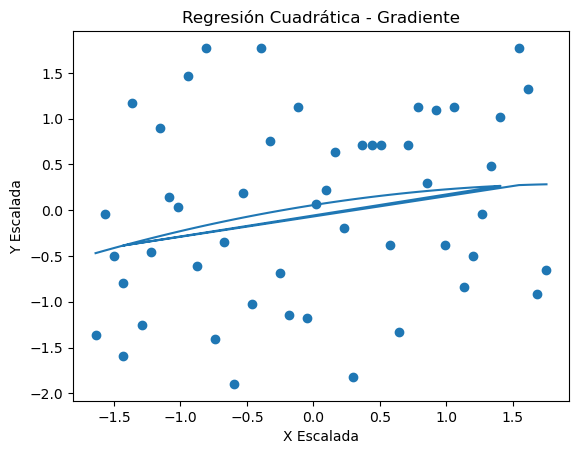

In [48]:
plt.figure()
plt.scatter(X_scaled, y_scaled)
plt.plot(X_scaled, y_pred_gd)
plt.title("Regresión Cuadrática - Gradiente")
plt.xlabel("X Escalada")
plt.ylabel("Y Escalada")
plt.show()

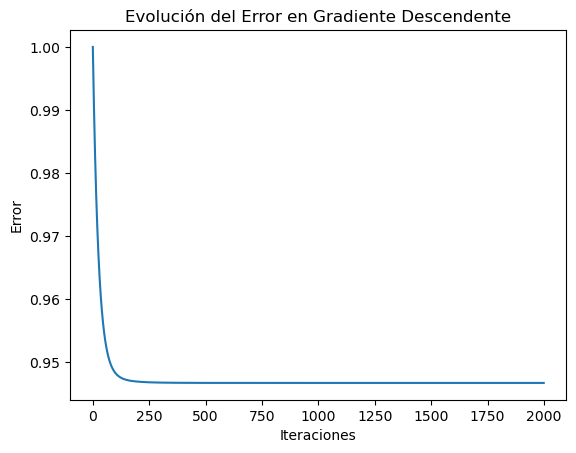

In [49]:
plt.figure()
plt.plot(loss_history)
plt.title("Evolución del Error en Gradiente Descendente")
plt.xlabel("Iteraciones")
plt.ylabel("Error")
plt.show()


- Aquí se observa cómo el error disminuye progresivamente hasta estabilizarse.

# Regresión Cuadrática - Gradiente

- Este gráfico representa el ajuste del modelo cuadrático obtenido mediante el algoritmo de descenso del gradiente. La curva se alinea de forma progresiva con la tendencia de los datos, mostrando que el método iterativo logra aproximarse de manera correcta a la solución óptima, aunque requiere múltiples iteraciones para lograrlo.

# Evolución del Error en Gradiente Descendente

- Este gráfico muestra cómo el error disminuye progresivamente a lo largo de las iteraciones del algoritmo de descenso del gradiente. Se observa una caída rápida del error al inicio y una posterior estabilización, lo que indica que el modelo ha convergido correctamente hacia un mínimo. Este comportamiento confirma que la tasa de aprendizaje utilizada es adecuada.

## 6. Redes Neuronales (MLP)

In [50]:
mlp_10 = MLPRegressor(hidden_layer_sizes=(10,), max_iter=5000)
mlp_10.fit(X_scaled, y_scaled.ravel())
y_pred_10 = mlp_10.predict(X_scaled)

In [51]:
mlp_50 = MLPRegressor(hidden_layer_sizes=(50,), max_iter=5000)
mlp_50.fit(X_scaled, y_scaled.ravel())
y_pred_50 = mlp_50.predict(X_scaled)

In [52]:
mlp_1000 = MLPRegressor(hidden_layer_sizes=(1000,), max_iter=5000)
mlp_1000.fit(X_scaled, y_scaled.ravel())
y_pred_1000 = mlp_1000.predict(X_scaled)

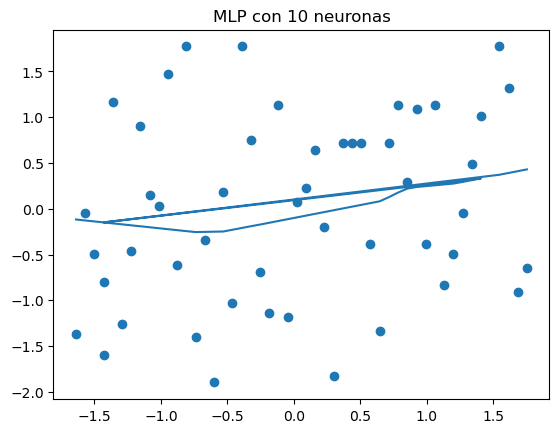

In [53]:
plt.figure()
plt.scatter(X_scaled, y_scaled)
plt.plot(X_scaled, y_pred_10)
plt.title("MLP con 10 neuronas")
plt.show()

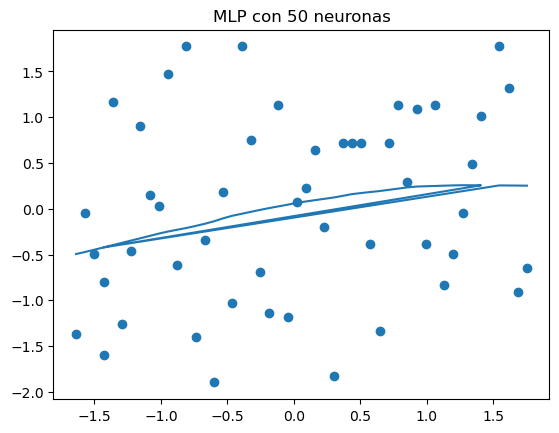

In [54]:
plt.figure()
plt.scatter(X_scaled, y_scaled)
plt.plot(X_scaled, y_pred_50)
plt.title("MLP con 50 neuronas")
plt.show()

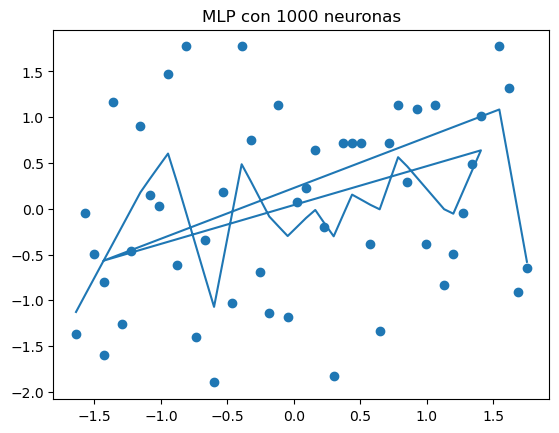

In [55]:
plt.figure()
plt.scatter(X_scaled, y_scaled)
plt.plot(X_scaled, y_pred_1000)
plt.title("MLP con 1000 neuronas")
plt.show()


- A mayor cantidad de neuronas aumenta la capacidad del modelo, pero también el riesgo de sobreajuste.

# MLP con 10 neuronas

- En este gráfico se observa el comportamiento de una red neuronal con una estructura más simple. La curva generada es más suavizada y presenta menor capacidad para ajustarse a la variabilidad de los datos. Esto sugiere un posible subajuste (underfitting), ya que el modelo no tiene suficiente complejidad para capturar completamente el patrón presente en los datos.

# MLP con 50 neuronas 

- Este gráfico muestra un equilibrio adecuado entre capacidad de aprendizaje y generalización. La red neuronal logra capturar de forma correcta la tendencia de los datos sin generar oscilaciones extremas. Esto indica que una arquitectura intermedia permite obtener buenos resultados sin incurrir en sobreajuste, ofreciendo una buena estabilidad en las predicciones.

# MLP con 1000 neuronas
- En este gráfico se visualiza el ajuste de una red neuronal con una gran cantidad de neuronas en la capa oculta. El comportamiento irregular de la curva evidencia que el modelo intenta ajustarse excesivamente a los datos, aprendiendo incluso el ruido. Esto confirma la presencia de sobreajuste (overfitting), lo que afecta la capacidad del modelo para generalizar correctamente ante nuevos datos.

## 7. Interpolación y Extrapolación

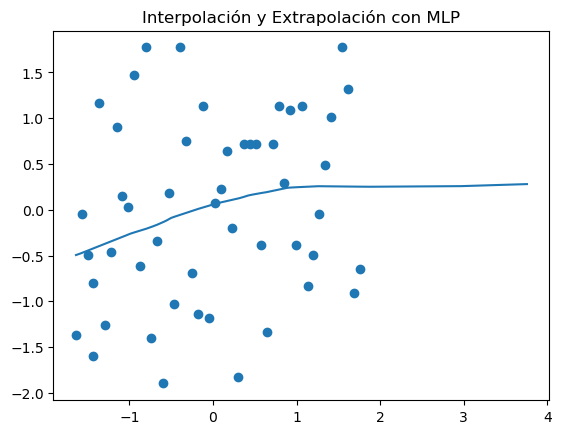

In [56]:
x_test = np.linspace(X_scaled.min(), X_scaled.max()+2, 200).reshape(-1,1)
mlp_curve = mlp_50.predict(x_test)

plt.figure()
plt.plot(x_test, mlp_curve)
plt.scatter(X_scaled, y_scaled)
plt.title("Interpolación y Extrapolación con MLP")
plt.show()


- Se analiza cómo se comporta el modelo fuera del rango original de datos.

- Este gráfico representa el comportamiento del modelo de red neuronal al predecir valores tanto dentro del rango original de los datos (interpolación) como fuera de él (extrapolación). Se observa que el modelo mantiene una tendencia aproximadamente lineal en la zona extrapolada, lo que indica una generalización aceptable. Sin embargo, al alejarse demasiado del rango original, la predicción puede perder precisión debido a que el modelo no ha sido entrenado con datos en esas regiones.

## 8. Tabla Comparativa Final

In [57]:
mse_10 = mean_squared_error(y_scaled, y_pred_10)
r2_10 = r2_score(y_scaled, y_pred_10)

mse_50 = mean_squared_error(y_scaled, y_pred_50)
r2_50 = r2_score(y_scaled, y_pred_50)

mse_1000 = mean_squared_error(y_scaled, y_pred_1000)
r2_1000 = r2_score(y_scaled, y_pred_1000)

In [58]:
results = pd.DataFrame({
    "Modelo": ["Analítico", "Gradiente", "MLP 10", "MLP 50", "MLP 1000"],
    "MSE": [mse_analytical, mse_gd, mse_10, mse_50, mse_1000],
    "R2": [r2_analytical, r2_gd, r2_10, r2_50, r2_1000]
})

results

,Modelo,MSE,R2
0,Analítico,0.946731,0.053269
1,Gradiente,0.946731,0.053269
2,MLP 10,0.963169,0.036831
3,MLP 50,0.947921,0.052079
4,MLP 1000,0.650919,0.349081


## 9. Conclusiones

- El modelo analítico presenta un ajuste estable y eficiente, ya que encuentra la solución óptima de forma directa mediante métodos matemáticos.

- El algoritmo de descenso del gradiente logra aproximarse correctamente al comportamiento real de los datos, demostrando una convergencia progresiva del error.

- Las redes neuronales muestran una mayor capacidad de adaptación frente a los datos, especialmente al aumentar el número de neuronas.

- Sin embargo, se evidencia que un exceso de neuronas en la red puede provocar sobreajuste (overfitting), afectando la capacidad de generalización del modelo.

### Comentario Final
Este análisis permitió comprender de manera práctica las diferencias entre los métodos tradicionales de regresión y los enfoques basados en inteligencia artificial. La comparación de resultados resalta la importancia de seleccionar adecuadamente el modelo según el problema, el volumen de datos y el nivel de complejidad requerido, logrando así un equilibrio entre precisión, eficiencia y capacidad de generalización.